## Load delhi pm2.5 data 

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 3000)
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
df = pd.read_csv('delhi.csv')
df['date']=pd.to_datetime(df['date'],format='%d-%m-%Y %H:%M')
print("Dataframe shape: ", df.shape)


Dataframe shape:  (2374, 2)


## Data type and index change

In [2]:
df.index=pd.to_datetime(df['date'],format='%d-%m-%Y %H:%M')
df = df.sort_index()

df['pm25'] = df['pm25'].replace('-',np.nan)
df['pm25']=df['pm25'].astype(str).astype(float)
df=df.rename(columns={"date": "date_dummy"})

## Line plot

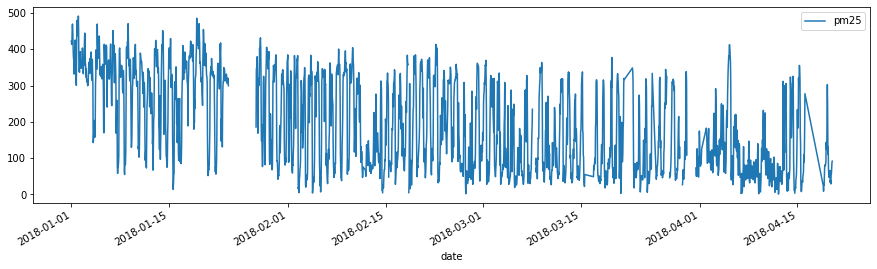

In [3]:
df.plot(y=["pm25"], figsize=(15,4))

## Gaps found in time series data, filled with missed datetime

In [4]:
start=df.date_dummy.min()
stop=df.date_dummy.max()
seriesDate=[]

while start < stop:
    start = start + timedelta(hours=1)
    seriesDate.append(start)

df3 = pd.DataFrame(columns = ['date_dummy', 'pm25']) 
df3['date_dummy']=seriesDate
result = pd.merge(df, df3, on="date_dummy", how="outer")
result=result.drop(columns=['pm25_y'])
result=result.rename(columns={"pm25_x": "pm25"})
df=result
print("Dataframe shape: ", df.shape)

Dataframe shape:  (2617, 2)


In [5]:
df_missing=df[(df['pm25'].isnull()==True)]
df = df.dropna()
df.count()

date_dummy    2294
pm25          2294
dtype: int64

In [6]:
def timewise_mean(arg_date):
    df1=df[(df['date_dummy'].dt.hour == arg_date.hour) & (df['date_dummy'].dt.day > arg_date.day-3) & (df['date_dummy'].dt.day < arg_date.day+3)] 
    return df1.pm25.mean()

for index,row in df_missing.iterrows():
    df_missing.at[index, 'Imputed_pm25'] =timewise_mean(row['date_dummy'])

C:\Users\Lakshmi K\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Lakshmi K\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [7]:
df2 = df.append(df_missing)

In [8]:
df2.index=pd.to_datetime(df2['date_dummy'],format='%d-%m-%Y %H:%M')
df2 = df2.sort_index()

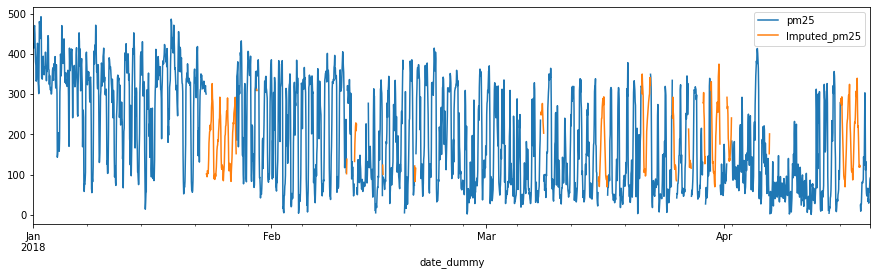

In [9]:
df2.plot(y=["pm25","Imputed_pm25"], figsize=(15,4))

## Down sampling - High frequency to low frequency (from days to months )

pm25  \
date_dummy                                         
2018-01-31  AxesSubplot(0.125,0.125;0.775x0.755)   
2018-02-28  AxesSubplot(0.125,0.125;0.775x0.755)   
2018-03-31  AxesSubplot(0.125,0.125;0.775x0.755)   
2018-04-30  AxesSubplot(0.125,0.125;0.775x0.755)   

                                    Imputed_pm25  
date_dummy                                        
2018-01-31  AxesSubplot(0.125,0.125;0.775x0.755)  
2018-02-28  AxesSubplot(0.125,0.125;0.775x0.755)  
2018-03-31  AxesSubplot(0.125,0.125;0.775x0.755)  
2018-04-30  AxesSubplot(0.125,0.125;0.775x0.755)

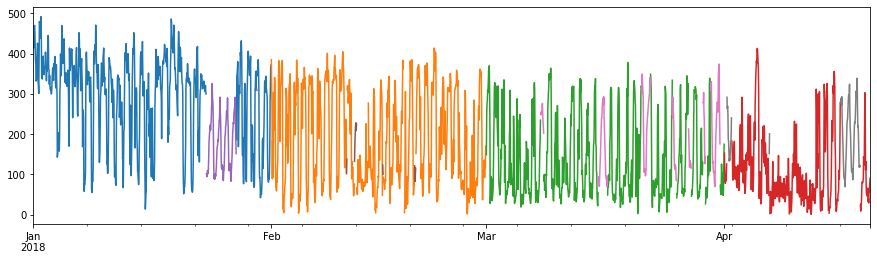

In [10]:
df2[["pm25","Imputed_pm25"]].resample("1m").plot(figsize=(15,4))


In [11]:
df2['pm25']=df2['pm25'].replace(np.nan,df2["Imputed_pm25"])

In [12]:
df2=df2.drop(columns=['Imputed_pm25'])

In [13]:
df2.describe()

pm25
count  2617.000000
mean    193.323877
std     121.376147
min       1.000000
25%      83.000000
50%     171.000000
75%     311.000000
max     492.000000

In [14]:
df_Cleaned=df2.copy()

pm25
date_dummy                                      
2018-01-31  AxesSubplot(0.125,0.125;0.775x0.755)
2018-02-28  AxesSubplot(0.125,0.125;0.775x0.755)
2018-03-31  AxesSubplot(0.125,0.125;0.775x0.755)
2018-04-30  AxesSubplot(0.125,0.125;0.775x0.755)

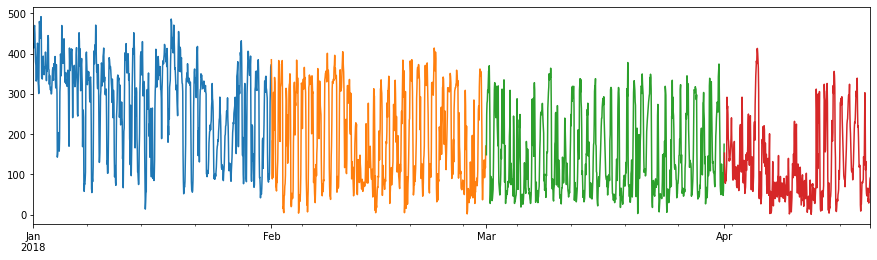

In [15]:
df_Cleaned[["pm25"]].resample("1m").plot(figsize=(15,4))

## Density plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002215043CF10>]],
      dtype=object)

<Figure size 216x216 with 0 Axes>

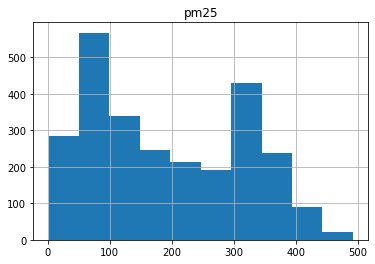

In [16]:
plt.figure(figsize=(3,3))
df_Cleaned.hist()

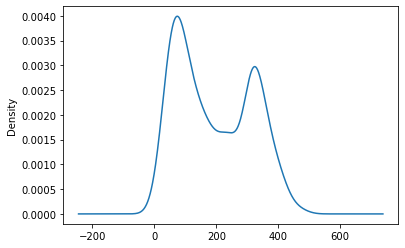

In [17]:
df_Cleaned['pm25'].plot(kind='kde')

## Box plot

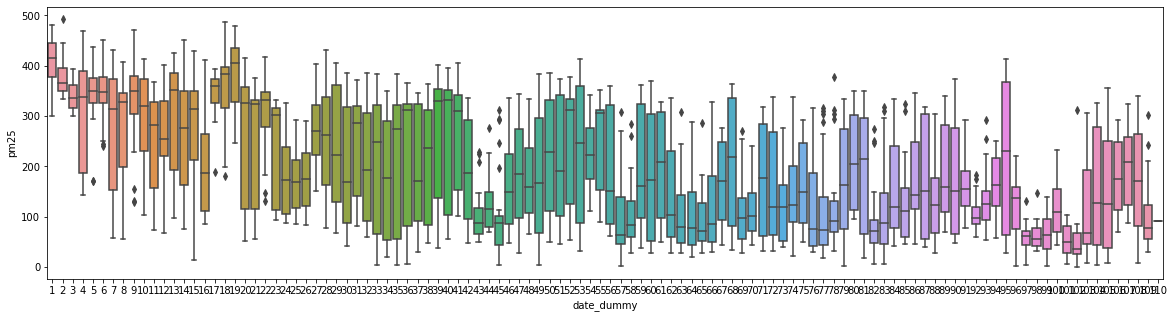

In [18]:
import seaborn
fig, ax = plt.subplots(figsize=(20,5))
seaborn.boxplot(df_Cleaned.index.dayofyear, df_Cleaned['pm25'], ax=ax)

## Data Preparation

In [19]:
df_Cleaned.reset_index(drop=True, inplace=True)
df_Cleaned

date_dummy        pm25
0    2018-01-01 00:00:00  423.000000
1    2018-01-01 01:00:00  414.000000
2    2018-01-01 02:00:00  417.000000
3    2018-01-01 03:00:00  466.000000
4    2018-01-01 04:00:00  470.000000
5    2018-01-01 05:00:00  449.000000
6    2018-01-01 06:00:00  404.000000
7    2018-01-01 07:00:00  380.000000
8    2018-01-01 08:00:00  371.000000
9    2018-01-01 09:00:00  332.000000
10   2018-01-01 10:00:00  336.000000
11   2018-01-01 11:00:00  382.000000
12   2018-01-01 12:00:00  411.000000
13   2018-01-01 13:00:00  426.000000
14   2018-01-01 14:00:00  420.000000
15   2018-01-01 15:00:00  330.000000
16   2018-01-01 16:00:00  320.000000
17   2018-01-01 17:00:00  301.000000
18   2018-01-01 18:00:00  386.000000
19   2018-01-01 19:00:00  480.000000
20   2018-01-01 20:00:00  472.000000
21   2018-01-01 21:00:00  444.000000
22   2018-01-01 22:00:00  438.000000
23   2018-01-01 23:00:00  448.000000
24   2018-01-02 00:00:00  492.000000
25   2018-01-02 01:00:00  446.000000
26   2018-01-02 02:00:00  341.000000
27   2018-01-02 03:00:00  342.000000
28   2018-01-02 04:00:00  337.000000
29   2018-01-02 05:00:00  362.000000
30   2018-01-02 06:00:00  384.000000
31   2018-01-02 07:00:00  394.000000
32   2018-01-02 08:00:00  364.000000
33   2018-01-02 09:00:00  350.000000
34   2018-01-02 10:00:00  348.000000
35   2018-01-02 11:00:00  367.000000
36   2018-01-02 12:00:00  367.000000
37   2018-01-02 13:00:00  365.000000
38   2018-01-02 14:00:00  404.000000
39   2018-01-02 15:00:00  380.000000
40   2018-01-02 16:00:00  351.000000
41   2018-01-02 17:00:00  333.000000
42   2018-01-02 18:00:00  357.000000
43   2018-01-02 19:00:00  356.000000
44   2018-01-02 20:00:00  365.000000
45   2018-01-02 21:00:00  423.000000
46   2018-01-02 22:00:00  445.000000
47   2018-01-02 23:00:00  439.000000
48   2018-01-03 00:00:00  362.000000
49   2018-01-03 01:00:00  360.000000
50   2018-01-03 02:00:00  324.000000
51   2018-01-03 03:00:00  346.000000
52   2018-01-03 04:00:00  321.000000
53   2018-01-03 05:00:00  311.000000
54   2018-01-03 06:00:00  310.000000
55   2018-01-03 07:00:00  316.000000
56   2018-01-03 08:00:00  300.000000
57   2018-01-03 09:00:00  301.000000
58   2018-01-03 10:00:00  321.000000
59   2018-01-03 11:00:00  338.000000
60   2018-01-03 12:00:00  359.000000
61   2018-01-03 13:00:00  365.000000
62   2018-01-03 14:00:00  343.000000
63   2018-01-03 15:00:00  334.000000
64   2018-01-03 16:00:00  375.000000
65   2018-01-03 17:00:00  364.000000
66   2018-01-03 18:00:00  367.000000
67   2018-01-03 19:00:00  361.000000
68   2018-01-03 20:00:00  393.000000
69   2018-01-03 21:00:00  333.000000
70   2018-01-03 22:00:00  315.000000
71   2018-01-03 23:00:00  316.000000
72   2018-01-04 00:00:00  373.000000
73   2018-01-04 01:00:00  329.000000
74   2018-01-04 02:00:00  301.000000
75   2018-01-04 03:00:00  143.000000
76   2018-01-04 04:00:00  150.000000
77   2018-01-04 05:00:00  171.000000
78   2018-01-04 06:00:00  170.000000
79   2018-01-04 07:00:00  204.000000
80   2018-01-04 08:00:00  178.000000
81   2018-01-04 09:00:00  158.000000
82   2018-01-04 10:00:00  190.000000
83   2018-01-04 11:00:00  305.000000
84   2018-01-04 12:00:00  325.000000
85   2018-01-04 13:00:00  399.000000
86   2018-01-04 14:00:00  388.000000
87   2018-01-04 15:00:00  345.000000
88   2018-01-04 16:00:00  364.000000
89   2018-01-04 17:00:00  470.000000
90   2018-01-04 18:00:00  416.000000
91   2018-01-04 19:00:00  393.000000
92   2018-01-04 20:00:00  387.000000
93   2018-01-04 21:00:00  376.000000
94   2018-01-04 22:00:00  409.000000
95   2018-01-04 23:00:00  420.000000
96   2018-01-05 00:00:00  437.000000
97   2018-01-05 01:00:00  391.000000
98   2018-01-05 02:00:00  346.000000
99   2018-01-05 03:00:00  329.000000
100  2018-01-05 04:00:00  341.000000
101  2018-01-05 05:00:00  353.000000
102  2018-01-05 06:00:00  326.000000
103  2018-01-05 07:00:00  335.000000
104  2018-01-05 08:00:00  323.000000
105  2018-01-05 09:00:00  319.000000
106  2018-01-05 10:00:00  320.000000
107  2018-01-05 11

In [20]:
df_Cleaned['hrs']='date_'+ df_Cleaned['date_dummy'].dt.hour.astype(str)
dummy=pd.DataFrame(pd.get_dummies(df_Cleaned['hrs']))
df_Final=pd.concat((df_Cleaned,dummy),axis=1)
t= np.arange(1,2618)
df_Final['t']=t
df_Final['t_square']=df_Final['t']*df_Final['t']

log_pm25=np.log(df_Final['pm25'])
df_Final['log_pm25']=log_pm25
df_Final

date_dummy        pm25      hrs  date_0  date_1  date_10  \
0    2018-01-01 00:00:00  423.000000   date_0       1       0        0   
1    2018-01-01 01:00:00  414.000000   date_1       0       1        0   
2    2018-01-01 02:00:00  417.000000   date_2       0       0        0   
3    2018-01-01 03:00:00  466.000000   date_3       0       0        0   
4    2018-01-01 04:00:00  470.000000   date_4       0       0        0   
5    2018-01-01 05:00:00  449.000000   date_5       0       0        0   
6    2018-01-01 06:00:00  404.000000   date_6       0       0        0   
7    2018-01-01 07:00:00  380.000000   date_7       0       0        0   
8    2018-01-01 08:00:00  371.000000   date_8       0       0        0   
9    2018-01-01 09:00:00  332.000000   date_9       0       0        0   
10   2018-01-01 10:00:00  336.000000  date_10       0       0        1   
11   2018-01-01 11:00:00  382.000000  date_11       0       0        0   
12   2018-01-01 12:00:00  411.000000  date_12       0       0        0   
13   2018-01-01 13:00:00  426.000000  date_13       0       0        0   
14   2018-01-01 14:00:00  420.000000  date_14       0       0        0   
15   2018-01-01 15:00:00  330.000000  date_15       0       0        0   
16   2018-01-01 16:00:00  320.000000  date_16       0       0        0   
17   2018-01-01 17:00:00  301.000000  date_17       0       0        0   
18   2018-01-01 18:00:00  386.000000  date_18       0       0        0   
19   2018-01-01 19:00:00  480.000000  date_19       0       0        0   
20   2018-01-01 20:00:00  472.000000  date_20       0       0        0   
21   2018-01-01 21:00:00  444.000000  date_21       0       0        0   
22   2018-01-01 22:00:00  438.000000  date_22       0       0        0   
23   2018-01-01 23:00:00  448.000000  date_23       0       0        0   
24   2018-01-02 00:00:00  492.000000   date_0       1       0        0   
25   2018-01-02 01:00:00  446.000000   date_1       0       1        0   
26   2018-01-02 02:00:00  341.000000   date_2       0       0        0   
27   2018-01-02 03:00:00  342.000000   date_3       0       0        0   
28   2018-01-02 04:00:00  337.000000   date_4       0       0        0   
29   2018-01-02 05:00:00  362.000000   date_5       0       0        0   
30   2018-01-02 06:00:00  384.000000   date_6       0       0        0   
31   2018-01-02 07:00:00  394.000000   date_7       0       0        0   
32   2018-01-02 08:00:00  364.000000   date_8       0       0        0   
33   2018-01-02 09:00:00  350.000000   date_9       0       0        0   
34   2018-01-02 10:00:00  348.000000  date_10       0       0        1   
35   2018-01-02 11:00:00  367.000000  date_11       0       0        0   
36   2018-01-02 12:00:00  367.000000  date_12       0       0        0   
37   2018-01-02 13:00:00  365.000000  date_13       0       0        0   
38   2018-01-02 14:00:00  404.000000  date_14       0       0        0   
39   2018-01-02 15:00:00  380.000000  date_15       0       0        0   
40   2018-01-02 16:00:00  351.000000  date_16       0       0        0   
41   2018-01-02 17:00:00  333.000000  date_17       0       0        0   
42   2018-01-02 18:00:00  357.000000  date_18       0       0        0   
43   2018-01-02 19:00:00  356.000000  date_19       0       0        0   
44   2018-01-02 20:00:00  365.000000  date_20       0       0        0   
45   2018-01-02 21:00:00  423.000000  date_21       0       0        0   
46   2018-01-02 22:00:00  445.000000  date_22       0       0        0   
47   2018-01-02 23:00:00  439.000000  date_23       0       0        0   
48   2018-01-03 00:00:00  362.000000   date_0       1       0        0   
49   2018-01-03 01:00:00  360.000000   date_1       0       1        0   
50   2018-01-03 02:00:00  324.000000   date_2       0       0        0   
51   2018-01-03 03:00:00  346.000000   date_3       0       0        0   
52   2018-01-03 04:00:00  321.000000   date_4       0       0        0   
53   2018-01-03 05

In [21]:
trainlen=int(df_Final.pm25.count()*0.8)
testlen=df_Final.pm25.count()-trainlen
#print(trainlen,testlen)

In [22]:
train= df_Final.head(trainlen)
test=df_Final.tail(testlen)

In [23]:
train

date_dummy        pm25      hrs  date_0  date_1  date_10  \
0    2018-01-01 00:00:00  423.000000   date_0       1       0        0   
1    2018-01-01 01:00:00  414.000000   date_1       0       1        0   
2    2018-01-01 02:00:00  417.000000   date_2       0       0        0   
3    2018-01-01 03:00:00  466.000000   date_3       0       0        0   
4    2018-01-01 04:00:00  470.000000   date_4       0       0        0   
5    2018-01-01 05:00:00  449.000000   date_5       0       0        0   
6    2018-01-01 06:00:00  404.000000   date_6       0       0        0   
7    2018-01-01 07:00:00  380.000000   date_7       0       0        0   
8    2018-01-01 08:00:00  371.000000   date_8       0       0        0   
9    2018-01-01 09:00:00  332.000000   date_9       0       0        0   
10   2018-01-01 10:00:00  336.000000  date_10       0       0        1   
11   2018-01-01 11:00:00  382.000000  date_11       0       0        0   
12   2018-01-01 12:00:00  411.000000  date_12       0       0        0   
13   2018-01-01 13:00:00  426.000000  date_13       0       0        0   
14   2018-01-01 14:00:00  420.000000  date_14       0       0        0   
15   2018-01-01 15:00:00  330.000000  date_15       0       0        0   
16   2018-01-01 16:00:00  320.000000  date_16       0       0        0   
17   2018-01-01 17:00:00  301.000000  date_17       0       0        0   
18   2018-01-01 18:00:00  386.000000  date_18       0       0        0   
19   2018-01-01 19:00:00  480.000000  date_19       0       0        0   
20   2018-01-01 20:00:00  472.000000  date_20       0       0        0   
21   2018-01-01 21:00:00  444.000000  date_21       0       0        0   
22   2018-01-01 22:00:00  438.000000  date_22       0       0        0   
23   2018-01-01 23:00:00  448.000000  date_23       0       0        0   
24   2018-01-02 00:00:00  492.000000   date_0       1       0        0   
25   2018-01-02 01:00:00  446.000000   date_1       0       1        0   
26   2018-01-02 02:00:00  341.000000   date_2       0       0        0   
27   2018-01-02 03:00:00  342.000000   date_3       0       0        0   
28   2018-01-02 04:00:00  337.000000   date_4       0       0        0   
29   2018-01-02 05:00:00  362.000000   date_5       0       0        0   
30   2018-01-02 06:00:00  384.000000   date_6       0       0        0   
31   2018-01-02 07:00:00  394.000000   date_7       0       0        0   
32   2018-01-02 08:00:00  364.000000   date_8       0       0        0   
33   2018-01-02 09:00:00  350.000000   date_9       0       0        0   
34   2018-01-02 10:00:00  348.000000  date_10       0       0        1   
35   2018-01-02 11:00:00  367.000000  date_11       0       0        0   
36   2018-01-02 12:00:00  367.000000  date_12       0       0        0   
37   2018-01-02 13:00:00  365.000000  date_13       0       0        0   
38   2018-01-02 14:00:00  404.000000  date_14       0       0        0   
39   2018-01-02 15:00:00  380.000000  date_15       0       0        0   
40   2018-01-02 16:00:00  351.000000  date_16       0       0        0   
41   2018-01-02 17:00:00  333.000000  date_17       0       0        0   
42   2018-01-02 18:00:00  357.000000  date_18       0       0        0   
43   2018-01-02 19:00:00  356.000000  date_19       0       0        0   
44   2018-01-02 20:00:00  365.000000  date_20       0       0        0   
45   2018-01-02 21:00:00  423.000000  date_21       0       0        0   
46   2018-01-02 22:00:00  445.000000  date_22       0       0        0   
47   2018-01-02 23:00:00  439.000000  date_23       0       0        0   
48   2018-01-03 00:00:00  362.000000   date_0       1       0        0   
49   2018-01-03 01:00:00  360.000000   date_1       0       1        0   
50   2018-01-03 02:00:00  324.000000   date_2       0       0        0   
51   2018-01-03 03:00:00  346.000000   date_3       0       0        0   
52   2018-01-03 04:00:00  321.000000   date_4       0       0        0   
53   2018-01-03 05

## Model 1 - Additive seasonality with linear trend

In [24]:
import statsmodels.formula.api as smf

In [25]:
addlinear= smf.ols('pm25~t+date_0+date_1+date_2+date_3+date_4+date_5+date_6+date_7+date_8+date_9+date_10+date_11+date_12+date_13+date_14+date_15+date_16+date_17+date_18+date_19+date_20+date_21+date_22+date_23',data=train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test[['t','date_0','date_1','date_2','date_3','date_4','date_5','date_6','date_7','date_8','date_9','date_10','date_11','date_12','date_13','date_14','date_15','date_16','date_17','date_18','date_19','date_20','date_21','date_22','date_23']])))
predaddlinear

rmseaddlinear=np.sqrt(np.mean((np.array(test['pm25'])-np.array(predaddlinear))**2))
rmseaddlinear

95.93730831014786

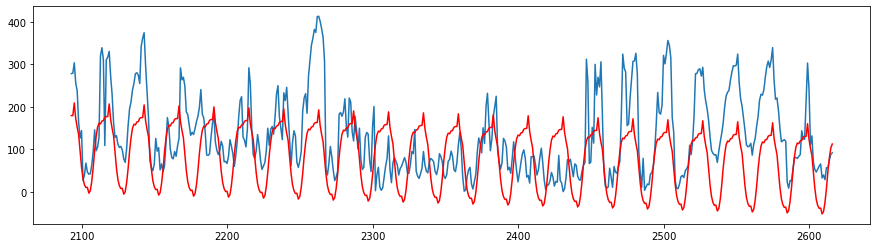

In [26]:
plt.figure(figsize=(15,4))
plt.plot(test['pm25'])
plt.plot(predaddlinear, color='red')
plt.show()

## Model 1 - Additive seasonality with quadratic trend

In [27]:

addquad=smf.ols('pm25~t+t_square+date_0+date_1+date_2+date_3+date_4+date_5+date_6+date_7+date_8+date_9+date_10+date_11+date_12+date_13+date_14+date_15+date_16+date_17+date_18+date_19+date_20+date_21+date_22+date_23',data=train).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test[['t','t_square','date_0','date_1','date_2','date_3','date_4','date_5','date_6','date_7','date_8','date_9','date_10','date_11','date_12','date_13','date_14','date_15','date_16','date_17','date_18','date_19','date_20','date_21','date_22','date_23']])))
rmseaddquad=np.sqrt(np.mean((np.array(test['pm25'])-np.array(predaddquad))**2))
rmseaddquad

84.88041347802692

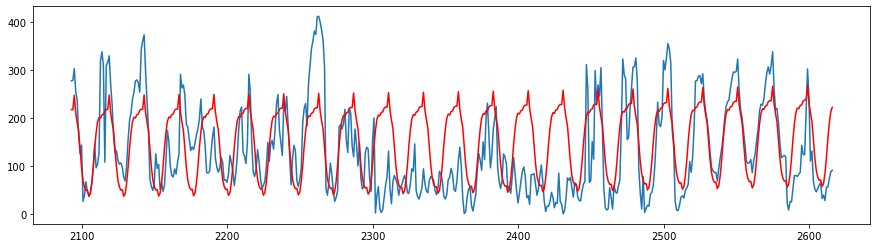

In [28]:
plt.figure(figsize=(15,4))
plt.plot(test['pm25'])
plt.plot(predaddquad, color='red')
plt.show()

## Model 2 - Multiplicative seasonality with linear trend

In [29]:


mullin=smf.ols('log_pm25~t+date_0+date_1+date_2+date_3+date_4+date_5+date_6+date_7+date_8+date_9+date_10+date_11+date_12+date_13+date_14+date_15+date_16+date_17+date_18+date_19+date_20+date_21+date_22+date_23',data=train).fit()
predmullin=pd.Series(mullin.predict(pd.DataFrame(test[['t','date_0','date_1','date_2','date_3','date_4','date_5','date_6','date_7','date_8','date_9','date_10','date_11','date_12','date_13','date_14','date_15','date_16','date_17','date_18','date_19','date_20','date_21','date_22','date_23']])))
rmsemulin=np.sqrt(np.mean((np.array(test['pm25'])-np.exp(predmullin))**2))
rmsemulin

92.17789836241136

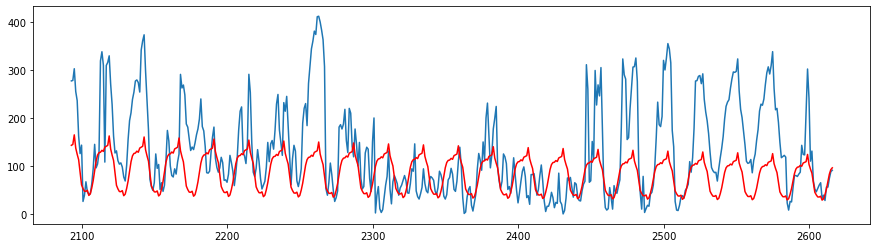

In [30]:
plt.figure(figsize=(15,4))
plt.plot(test['pm25'])
plt.plot(np.exp(predmullin), color='red')
plt.show()

## Model 2 - Multiplicative seasonality with quadratic trend

In [31]:
mul_quad=smf.ols('log_pm25~t+t_square+date_0+date_1+date_2+date_3+date_4+date_5+date_6+date_7+date_8+date_9+date_10+date_11+date_12+date_13+date_14+date_15+date_16+date_17+date_18+date_19+date_20+date_21+date_22+date_23',data=train).fit()
pred_mul_quad=pd.Series(mul_quad.predict(pd.DataFrame(test[['t','t_square','date_0','date_1','date_2','date_3','date_4','date_5','date_6','date_7','date_8','date_9','date_10','date_11','date_12','date_13','date_14','date_15','date_16','date_17','date_18','date_19','date_20','date_21','date_22','date_23']])))
rmse_mul_quad=np.sqrt(np.mean((np.array(test['pm25'])-np.exp(pred_mul_quad))**2))
rmse_mul_quad

79.5036012412615

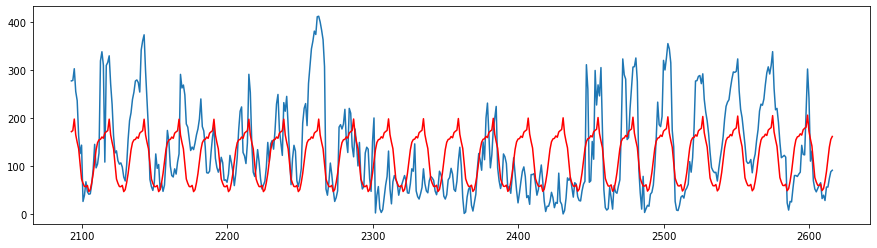

In [32]:
plt.figure(figsize=(15,4))
plt.plot(test['pm25'])
plt.plot(np.exp(pred_mul_quad), color='red')
plt.show()

In [33]:
data={'Model':pd.Series(['Additive_Linear','Additive_Quadratic','Multiplicative_Linear','Multiplicative_Quadratic']),'RMSE':pd.Series([rmseaddlinear,rmseaddquad,rmsemulin,rmse_mul_quad])}
data

Rmse=pd.DataFrame(data)
Rmse.sort_values(by=['RMSE'])

Model       RMSE
3  Multiplicative_Quadratic  79.503601
1        Additive_Quadratic  84.880413
2     Multiplicative_Linear  92.177898
0           Additive_Linear  95.937308